# Armenian Car Prices Dataset

In [39]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [40]:
cars = pd.read_csv("Armenian Market Car Prices.csv")
cars.head()

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500


In [41]:
df = cars.copy()

In [42]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year          │   0 │     0 │     2010 │    9.114 │  1943 │   2004 │    2011 │    2018 │     2024 │    ▁▆▇ │  │
│ │ Mileage       │   0 │     0 │   146400 │   108400 │    10 │  60000 │  130000 │  210000 │  1000000 │  ▇▅▁   │  │
│ │ Price         │   0 │     0 │    15560 │    17730 │   200 │   6000 │   11500 │   19000 │   565000 │   ▇    │  │
│ └───────────────┴─────┴───────┴──────────┴──────────┴───────┴────────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Car Name                  │       0 │          0 │                          2.4 │                    19072 │  │
│ │ Region                    │       0 │          0 │                          1.1 │                     8608 │  │
│ │ FuelType                  │       0 │          0 │                            1 │                     7995 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [43]:
def check_for_duplicates(df):
    # Returns info about duplicated values
    duplicated = df.duplicated()
    if True in duplicated:
        print('The dataframe does have duplicate values!')
    else: print("The dataframe doesn't have duplicate values!")
    return duplicated

check_for_duplicates(df)

The dataframe doesn't have duplicate values!


0       False
1       False
2       False
3       False
4       False
        ...  
7990    False
7991    False
7992    False
7993    False
7994    False
Length: 7995, dtype: bool

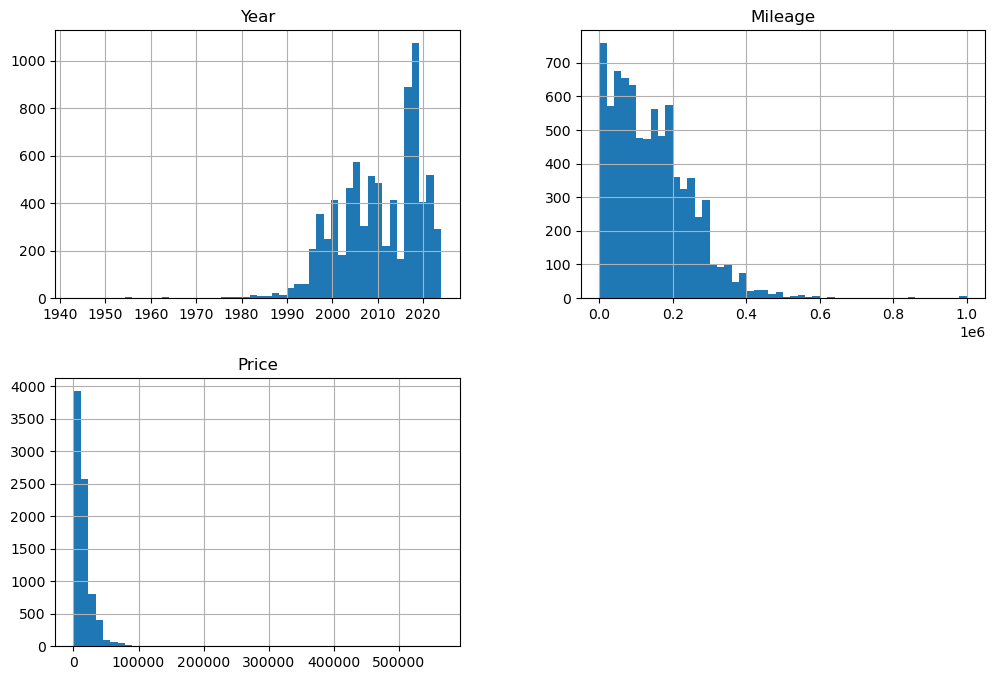

In [44]:
df_num = df.select_dtypes(include=[np.number])
df_num.hist(bins = 50, figsize=(12,8))
plt.show()

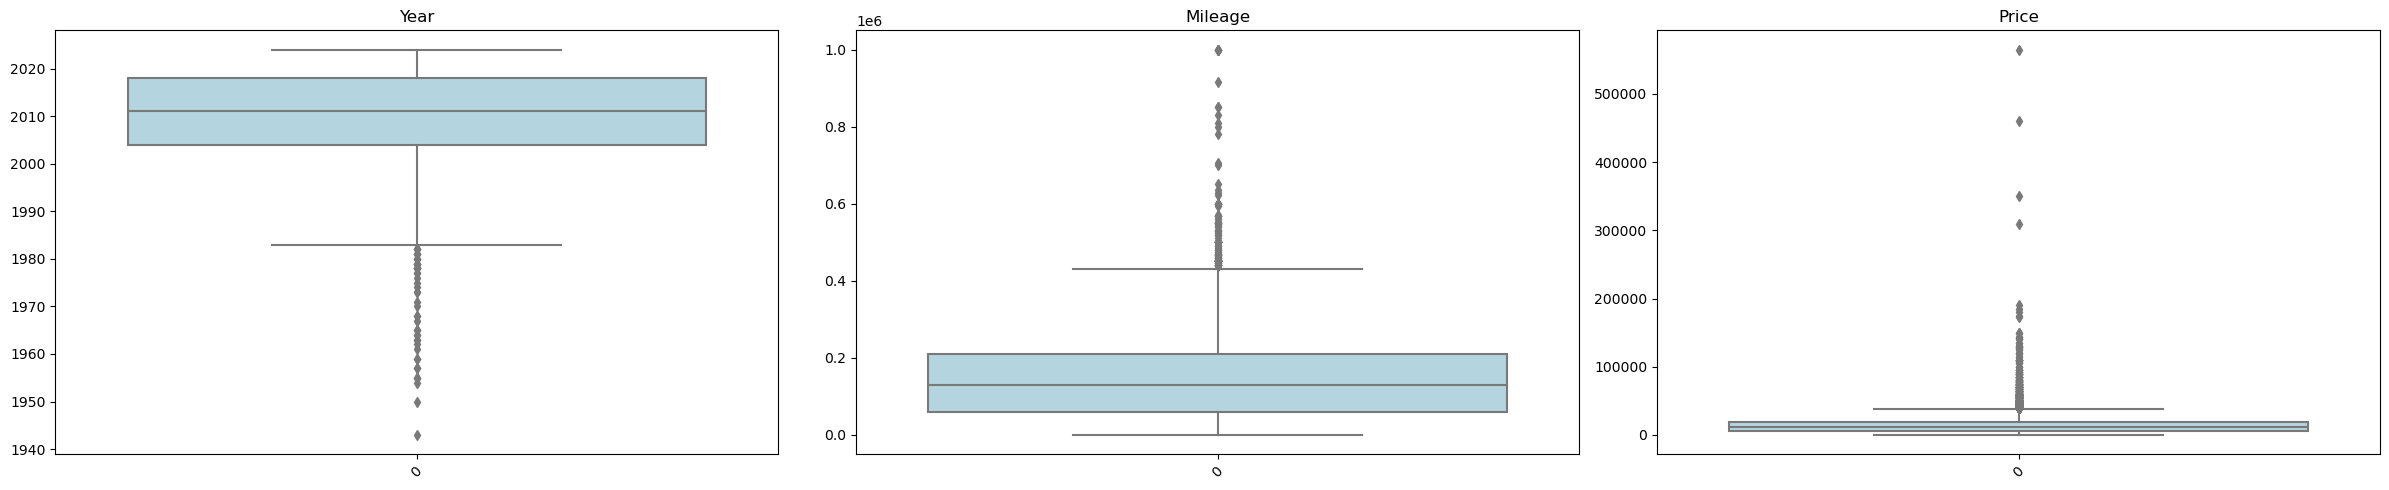

In [45]:
def figure_boxplots(df):    
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_size_inches(24,5)
    for column, index in zip(df.columns, [0,1,2]):
        sns.boxplot(data=sorted(df[column]), ax=axes[index], color='lightblue')
        axes[index].set_title(column)
        axes[index].tick_params(axis='x', labelrotation=45)
    plt.tight_layout()
    fig.savefig('boxplots.jpg', dpi='figure', format='jpg')
    del df
    pass

figure_boxplots(df_num)

In [46]:
# Usuwanie wartości odstających za pomocą metody IQR

def IQR_method(df,threshold=3):
    df_num = df.select_dtypes(include=[np.number])
    for column in df_num.columns:
        Q1, Q3 = np.percentile(df_num[column], [25,75])
        IQR = Q3-Q1
        filtered_df = df[(df[column] < (Q3 + threshold*IQR)) & (df[column] > (Q1 - threshold*IQR))]
    return filtered_df

df = IQR_method(df,2)
print(df.shape)
df.head()


(7693, 6)


,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500


In [47]:
# Logarytmowanie cech, aby uzyskać rozkłady bliższe Gaussowskiemu
for column in df_num.columns:
    df[column] = df[column].apply(lambda element: math.log2(element))

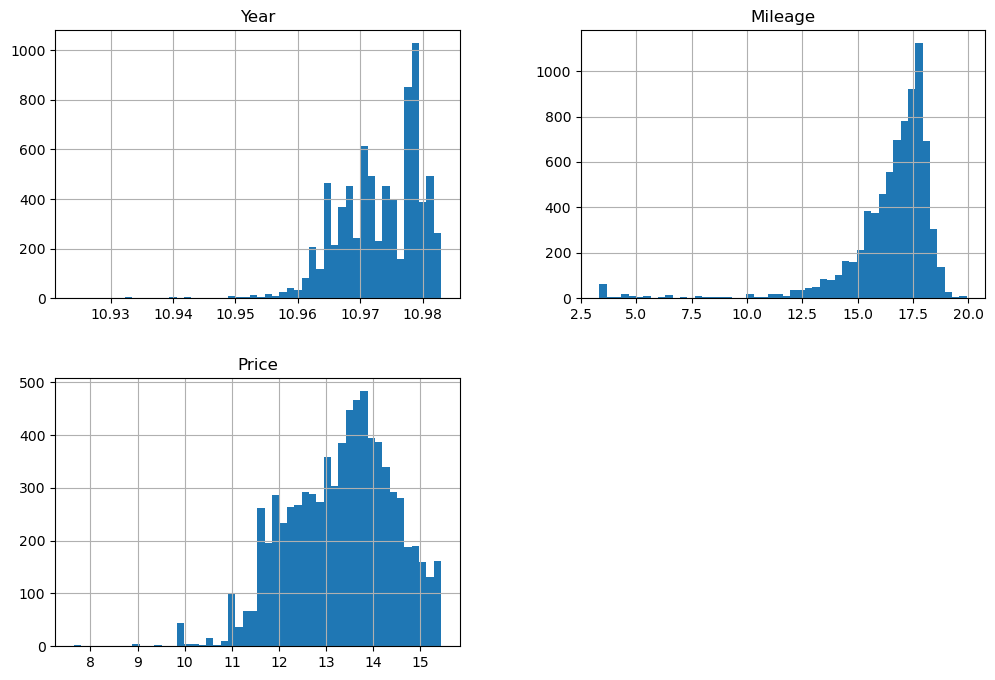

In [48]:
df[['Year','Mileage','Price']].hist(bins = 50, figsize=(12,8))
plt.show()

In [49]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat = df.select_dtypes(include=[object])
df_cat = cat_encoder.fit_transform(df_cat)

In [50]:
from sklearn.preprocessing import MinMaxScaler
num_scaler = MinMaxScaler()
df_num_1 = num_scaler.fit_transform(df_num)

In [51]:
cat_encoder.get_feature_names_out()

array(['Car Name_AIQAR eQ3', 'Car Name_Acura ILX', 'Car Name_Acura MDX',
       'Car Name_Acura RDX', 'Car Name_Alfa Romeo 147 hatchback',
       'Car Name_Alfa Romeo 159 wagon', 'Car Name_Alfa Romeo Giulia',
       'Car Name_Alfa Romeo Stelvio', 'Car Name_Audi 100',
       'Car Name_Audi 200', 'Car Name_Audi 80', 'Car Name_Audi 80 wagon',
       'Car Name_Audi A3', 'Car Name_Audi A4', 'Car Name_Audi A4 wagon',
       'Car Name_Audi A5 coupe', 'Car Name_Audi A6',
       'Car Name_Audi A6 wagon', 'Car Name_Audi A7', 'Car Name_Audi A8',
       'Car Name_Audi E-tron', 'Car Name_Audi Q3',
       'Car Name_Audi Q4 Sportback e-tron', 'Car Name_Audi Q5',
       'Car Name_Audi Q7', 'Car Name_Audi Q8 e-tron',
       'Car Name_Audi RS Q8', 'Car Name_Audi RS4 wagon',
       'Car Name_Audi RS5', 'Car Name_Audi RS7', 'Car Name_Audi S4',
       'Car Name_Audi SQ8', 'Car Name_Audi SQ8 e-tron',
       'Car Name_BMW 1 Series coupe', 'Car Name_BMW 1 Series hatchback',
       'Car Name_BMW 2 Series', 'Ca

In [52]:
num_scaler.get_feature_names_out()

array(['Year', 'Mileage', 'Price'], dtype=object)

In [53]:
# Możliwość powrotu do Dataframe
df_output = pd.DataFrame(num_scaler.transform(df_num_1),
                         columns = num_scaler.get_feature_names_out(),
                         index = df_num.index)

df_output

c:\Users\kamil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Year,Mileage,Price
0,-23.978662,-0.00001,-0.000354
1,-23.976376,-0.00001,-0.000354
2,-23.979271,-0.00001,-0.000354
3,-23.975918,-0.00001,-0.000354
4,-23.979271,-0.00001,-0.000354
...,...,...,...
7990,-23.976985,-0.00001,-0.000354
7991,-23.976223,-0.00001,-0.000354
7992,-23.978814,-0.00001,-0.000354
7993,-23.977595,-0.00001,-0.000354


In [43]:
# Konstrukcja customowego transformatora, który będzie stosował logarytmowanie na podane dane numeryczne. Transformator musi mieć metodę fit i transform:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names

    def fit(self, X, y=None): # y=None bo metoda tego wymaga
        X = check_array(X) # Sprawdzenie czy X jest tablicą z wartościami zmiennoprzecinkowymi
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X, y=None):
        check_is_fitted(self) # wyszukiwanie atrybutów ze znacznikiem _
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        X_ = pd.DataFrame(X, columns=self.feature_names)
        
        for feature_name in self.feature_names:
            X_[feature_name].apply(lambda x: np.log2(x) if pd.notnull(x) else x)
        return X_

# Transformator identyfikujący outliery metodą IQR i zastępujący wartości odstające średnią
class IQRTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=1.5):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        X = check_array(X) 
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X, y=None):
        check_is_fitted(self) 
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        X_ = X.copy()

        Q1,Q3 = np.percentile(X, [25,75])
        IQR = Q3 - Q1
        
        condition = ((X >= (Q1 - (IQR * self.threshold))) & (X <= (Q3 + (IQR * self.threshold))))
        X_[condition] = X_.mean()
        
        return X_



In [ ]:
# To samo ale z wykorzystaniem Function Transformer
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(df_num['Mileage'])

In [44]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

cars = pd.read_csv("Armenian Market Car Prices.csv")
df = cars.copy()

num_columns = df.select_dtypes(include=[np.number]).columns
cat_columns = df.select_dtypes(include=[object]).columns

num_pipeline = Pipeline([
    ('iqr_outlier_removal', IQRTransformer(threshold=1.5)), # każda funkcja musi zawierać metodę fit_transform()
    ('log_transformer',LogTransformer(feature_names=num_columns)),
    ('standarize', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('encoding', OneHotEncoder())
])

preprocessing = ColumnTransformer(
    [
        ('cat_columns', cat_pipeline, make_column_selector(dtype_include=object)),
        ('num_columns', num_pipeline, make_column_selector(dtype_include=np.number))
    ]
)

In [45]:
df = preprocessing.fit_transform(df)